In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

import math

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum columns
# pd.set_option('display.max_rows', None)

pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
import re 

def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''\n' "!?|.,*+-_/][\\n''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [4]:
df = pd.read_csv("/Users/saint/Desktop/IT/CLARUSWAY/00_DATA_SCIENCE/LESSON/05_GIT_HUB_REPOSITORIES/Data_Science_Capstone_Projects/Data_Science_AutoScout_Capstone_Project/withoutoutliers_autoscout.csv")
df

body_type   price_€               vat        km   hp_kW            type  \
0        Sedans 15770.000    VAT deductible 56013.000  66.000            Used   
1        Sedans 14500.000  Price negotiable 80000.000 141.000            Used   
2        Sedans 14640.000    VAT deductible 83450.000  85.000            Used   
3        Sedans 14500.000    VAT deductible 73000.000  66.000            Used   
4        Sedans 16790.000    VAT deductible 16200.000  66.000            Used   
...         ...       ...               ...       ...     ...             ...   
15914       Van 39950.000    VAT deductible    16.987 147.000             New   
15915       Van 39885.000    VAT deductible  9900.000 165.000            Used   
15916       Van 39875.000    VAT deductible    15.000 146.000  Pre-registered   
15917       Van 39700.000    VAT deductible    10.000 147.000  Pre-registered   
15918       Van 40999.000    VAT deductible  3373.868 165.000   Demonstration   

       previous_owners  warranty     make   model body_color paint_type  \
0                2.000     0.000     Audi      A1      Black   Metallic   
1                1.000     0.000     Audi      A1        Red   Metallic   
2                1.000     0.000     Audi      A1      Black   Metallic   
3                1.000     0.000     Audi      A1      Brown   Metallic   
4                1.000     0.000     Audi      A1      Black   Metallic   
...                ...       ...      ...     ...        ...        ...   
15914            0.000     1.000  Renault  Espace       Grey   Metallic   
15915            1.000     0.000  Renault  Espace       Grey   Metallic   
15916            1.000     0.000  Renault  Espace      White   Metallic   
15917            1.000     0.000  Renault  Espace       Grey   Metallic   
15918            1.000     0.000  Renault  Espace       Grey   Metallic   

         upholstery  nr_of_doors  nr_of_seats gearing_type  \
0             Cloth        5.000        5.000    Automatic   
1             Cloth        3.000        4.000    Automatic   
2             Cloth        4.000        4.000    Automatic   
3             Cloth        3.000        4.000    Automatic   
4             Cloth        5.000        5.000    Automatic   
...             ...          ...          ...          ...   
15914  Full leather        5.000        5.000    Automatic   
15915         Cloth        5.000        5.000    Automatic   
15916  Full leather        5.000        7.000    Automatic   
15917  Part leather        5.000        7.000    Automatic   
15918  Full leather        5.000        5.000    Automatic   

       engine_displacement_cc  cylinders  weight_kg drive_chain     fuel  \
0                    1500.000      3.000   1220.000       front   Diesel   
1                    1800.000      4.000   1255.000       front  Benzine   
2                    1600.000      3.000   1195.000       front   Diesel   
3                    1500.000      3.000   1195.000       front   Diesel   
4                    1500.000      3.000   1195.000       front   Diesel   
...                       ...        ...        ...         ...      ...   
15914                2000.000      4.000   1758.000       front   Diesel   
15915                1800.000      4.000   1708.000       front  Benzine   
15916                2000.000      4.000   1685.000       front   Diesel   
15917                2000.000      4.000   1758.000       front   Diesel   
15918                1800.000      4.000   1685.000         4WD  Benzine   

       co2e_g emission_class  \
0      99.000         Euro 6   
1     129.000         Euro 6   
2      99.000         Euro 6   
3      99.000         Euro 6   
4     109.000         Euro 6   
...       ...            ...   
15914 139.000   Euro 6d-TEMP   
15915 164.000         Euro 6   
15916 139.000   Euro 6d-TEMP   
15917 139.000         Euro 6   
15918 153.000         Euro 6   

                                     comfort&convenience  \
0      Air conditioning,Armre

In [5]:
df_dummy=pd.get_dummies(df, columns=["body_type", "vat", "type", "previous_owners",  "make", "model", "warranty", "body_color", "paint_type", "upholstery", "nr_of_doors", "nr_of_seats", "gearing_type", "engine_displacement_cc", "cylinders", "drive_chain", "fuel", "emission_class", "gears", "country_version"], drop_first=True)
df_dummy

price_€        km   hp_kW  weight_kg  co2e_g  \
0     15770.000 56013.000  66.000   1220.000  99.000   
1     14500.000 80000.000 141.000   1255.000 129.000   
2     14640.000 83450.000  85.000   1195.000  99.000   
3     14500.000 73000.000  66.000   1195.000  99.000   
4     16790.000 16200.000  66.000   1195.000 109.000   
...         ...       ...     ...        ...     ...   
15914 39950.000    16.987 147.000   1758.000 139.000   
15915 39885.000  9900.000 165.000   1708.000 164.000   
15916 39875.000    15.000 146.000   1685.000 139.000   
15917 39700.000    10.000 147.000   1758.000 139.000   
15918 40999.000  3373.868 165.000   1685.000 153.000   

                                     comfort&convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15914  Air conditioning,Automatic climate control,Cru...   
15915  Air conditioning,Automatic climate control,Cru...   
15916  Air conditioning,Armrest,Automatic climate con...   
15917  Air conditioning,Automatic climate control,Cru...   
15918  Air conditioning,Automatic climate control,Cru...   

                                     entertainment&media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15914  Bluetooth,Digital radio,Hands-free equipment,O...   
15915  Bluetooth,Digital radio,Hands-free equipment,R...   
15916  Bluetooth,Hands-free equipment,On-board comput...   
15917                  Bluetooth,Digital radio,Radio,USB   
15918                                                USB   

                                                  extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15914                          Alloy wheels,Touch screen   
15915            Alloy wheels,Touch screen,Voice Control   
15916                                       Alloy wheels   
15917                          Alloy wheels,Touch screen   
15918                          Alloy wheels,Touch screen   

                                         safety&security  consumption_comb  \
0      ABS,Central door lock,Daytime running lights,D...             3.800   
1      ABS,Central door lock,Central door lock with r...             5.600   
2      ABS,Central door lock,Daytime running lights,D...             3.800   
3      ABS,Alarm system,Central door lock with remote...             3.800   
4      ABS,Central door lock,Driver-side airbag,Elect...             4.100   
...                                                  ...               ...   
15914  ABS,Central door lock,Central door lock with r...             5.300   
15915  ABS,Adaptive Cruise Control,Blind spot monitor...             7.400   
15916  ABS,Adaptive Cruise Control,Blind spot monitor...             5.300   
15917  ABS,Blind spot monitor,Driver-side airbag,Elec...             5.300   
15918  ABS,Blind spot monitor,Daytime running lights,...             6.800   

        age  body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
0     3.000                      0                0                   0   
1     2.000                      0                0                   0   
2     3.00

In [6]:
df["comfort&convenience"].str.get_dummies(sep=",").add_prefix("c&c_")

c&c_Air conditioning  c&c_Air suspension  c&c_Armrest  \
0                         1                   0            1   
1                         1                   0            0   
2                         1                   0            0   
3                         0                   1            1   
4                         1                   0            1   
...                     ...                 ...          ...   
15914                     1                   0            0   
15915                     1                   0            0   
15916                     1                   0            1   
15917                     1                   0            0   
15918                     1                   0            0   

       c&c_Automatic climate control  c&c_Auxiliary heating  \
0                                  1                      0   
1                                  1                      0   
2                                  0                      0   
3                                  0                      1   
4                                  1                      0   
...                              ...                    ...   
15914                              1                      0   
15915                              1                      0   
15916                              1                      0   
15917                              1                      0   
15918                              1                      0   

       c&c_Cruise control  c&c_Electric Starter  c&c_Electric tailgate  \
0                       1                     0                      0   
1                       0                     0                      0   
2                       1                     0                      0   
3                       0                     0                      0   
4                       0                     0                      0   
...                   ...                   ...                    ...   
15914                   1                     0                      0   
15915                   1                     0                      1   
15916                   1                     0                      1   
15917                   1                     0                      0   
15918                   1                     0                      1   

       c&c_Electrical side mirrors  c&c_Electrically adjustable seats  \
0                                1                                  0   
1                                0                                  0   
2                                1                                  0   
3                                1                                  0   
4                                1                                  0   
...                            ...                                ...   
15914                            1                                  1   
15915                            1                                  0   
15916                            1                                  0   
15917                            1                                  1   
15918                            1                                  1   

       c&c_Electrically heated windshield  c&c_Heads-up display  \
0                                       0                     0   
1                                       0                     0   
2                                       0                     0   
3                                       0                     1   
4                                       0                     0   
...                                   ...                   ...   
15914                                   0                     0   
15915                                   1                     1   
15916                                   1                     1   
15917                                   0    

In [7]:
comfort_dummy = df["comfort&convenience"].str.get_dummies(sep=",").add_prefix("c&c_")

In [8]:
df["entertainment&media"].str.get_dummies(sep=",").add_prefix("e&m_")

e&m_Bluetooth  e&m_CD player  e&m_Digital radio  \
0                  1              0                  0   
1                  1              0                  0   
2                  0              0                  0   
3                  1              1                  0   
4                  1              1                  0   
...              ...            ...                ...   
15914              1              0                  1   
15915              1              0                  1   
15916              1              0                  0   
15917              1              0                  1   
15918              0              0                  0   

       e&m_Hands-free equipment  e&m_MP3  e&m_On-board computer  e&m_Radio  \
0                             1        0                      1          1   
1                             1        0                      1          1   
2                             0        1                      1          0   
3                             1        1                      1          1   
4                             1        1                      1          1   
...                         ...      ...                    ...        ...   
15914                         1        0                      1          1   
15915                         1        0                      0          1   
15916                         1        0                      1          1   
15917                         0        0                      0          1   
15918                         0        0                      0          0   

       e&m_Sound system  e&m_Television  e&m_USB  
0                     0               0        0  
1                     1               0        0  
2                     0               0        0  
3                     1               0        1  
4                     0               0        1  
...                 ...             ...      ...  
15914                 0               0        1  
15915                 0               0        1  
15916                 0               0        0  
15917                 0               0        1  
15918                 0               0        1  

[15919 rows x 10 columns]

In [9]:
entertainment_dummy = df["entertainment&media"].str.get_dummies(sep=",").add_prefix("e&m_")

In [10]:
df["extras"].str.get_dummies(sep=",").add_prefix("extras_")

extras_Alloy wheels  extras_Cab or rented Car  \
0                        1                         0   
1                        1                         0   
2                        1                         0   
3                        1                         0   
4                        1                         0   
...                    ...                       ...   
15914                    1                         0   
15915                    1                         0   
15916                    1                         0   
15917                    1                         0   
15918                    1                         0   

       extras_Catalytic Converter  extras_Handicapped enabled  \
0                               1                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
15914                           0                           0   
15915                           0                           0   
15916                           0                           0   
15917                           0                           0   
15918                           0                           0   

       extras_Right hand drive  extras_Roof rack  extras_Shift paddles  \
0                            0                 0                     0   
1                            0                 0                     0   
2                            0                 0                     0   
3                            0                 0                     0   
4                            0                 0                     0   
...                        ...               ...                   ...   
15914                        0                 0                     0   
15915                        0                 0                     0   
15916                        0                 0                     0   
15917                        0                 0                     0   
15918                        0                 0                     0   

       extras_Ski bag  extras_Sliding door  extras_Sport package  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     1   
...               ...                  ...                   ...   
15914               0                    0                     0   
15915               0                    0                     0   
15916               0                    0                     0   
15917               0                    0                     0   
15918               0                    0                     0   

       extras_Sport seats  extras_Sport suspension  extras_Touch screen  \
0                       0                        0                    0   
1                       1                        1                    0   
2                       0                        0                    0   
3                       1                        0                    0   
4                       0                        1                    0   
...                   ...                      ...                  ...   
15914                   0                        0                    1   
15915                   0                        0                    1   
15916                   0                        0                    0   
15917                   0                        0                    1   
15918                 

In [11]:
extras_dummy = df["extras"].str.get_dummies(sep=",").add_prefix("extras_")

In [12]:
df["safety&security"].str.get_dummies(sep=",").add_prefix("s&s_")

s&s_ABS  s&s_Adaptive Cruise Control  s&s_Adaptive headlights  \
0            1                            0                        0   
1            1                            0                        0   
2            1                            0                        0   
3            1                            0                        0   
4            1                            0                        0   
...        ...                          ...                      ...   
15914        1                            0                        0   
15915        1                            1                        0   
15916        1                            1                        0   
15917        1                            0                        0   
15918        1                            0                        0   

       s&s_Alarm system  s&s_Blind spot monitor  s&s_Central door lock  \
0                     0                       0                      1   
1                     0                       0                      1   
2                     0                       0                      1   
3                     1                       0                      0   
4                     0                       0                      1   
...                 ...                     ...                    ...   
15914                 0                       0                      1   
15915                 0                       1                      1   
15916                 0                       1                      1   
15917                 0                       1                      0   
15918                 0                       1                      0   

       s&s_Central door lock with remote control  s&s_Daytime running lights  \
0                                              0                           1   
1                                              1                           1   
2                                              0                           1   
3                                              1                           0   
4                                              0                           0   
...                                          ...                         ...   
15914                                          1                           0   
15915                                          0                           1   
15916                                          0                           1   
15917                                          0                           0   
15918                                          0                           1   

       s&s_Driver drowsiness detection  s&s_Driver-side airbag  \
0                                    0                       1   
1                                    0                       1   
2                                    0                       1   
3                                    1                       1   
4                                    0                       1   
...                                ...                     ...   
15914                                0                       1   
15915                                0                       1   
15916                                0                       1   
15917                                0                       1   
15918                                0                       1   

       s&s_Electronic stability control  s&s_Emergency brake assistant  \
0                                     1                              0   
1                                     1                              0   
2                                     1                              0   
3                                     1                              0   
4                                     1                              0   
...                                 ...                

In [13]:
safety_dummy = df["safety&security"].str.get_dummies(sep=",").add_prefix("s&s_")

In [14]:
df_dummy.join([comfort_dummy, entertainment_dummy, extras_dummy, safety_dummy])

price_€        km   hp_kW  weight_kg  co2e_g  \
0     15770.000 56013.000  66.000   1220.000  99.000   
1     14500.000 80000.000 141.000   1255.000 129.000   
2     14640.000 83450.000  85.000   1195.000  99.000   
3     14500.000 73000.000  66.000   1195.000  99.000   
4     16790.000 16200.000  66.000   1195.000 109.000   
...         ...       ...     ...        ...     ...   
15914 39950.000    16.987 147.000   1758.000 139.000   
15915 39885.000  9900.000 165.000   1708.000 164.000   
15916 39875.000    15.000 146.000   1685.000 139.000   
15917 39700.000    10.000 147.000   1758.000 139.000   
15918 40999.000  3373.868 165.000   1685.000 153.000   

                                     comfort&convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15914  Air conditioning,Automatic climate control,Cru...   
15915  Air conditioning,Automatic climate control,Cru...   
15916  Air conditioning,Armrest,Automatic climate con...   
15917  Air conditioning,Automatic climate control,Cru...   
15918  Air conditioning,Automatic climate control,Cru...   

                                     entertainment&media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15914  Bluetooth,Digital radio,Hands-free equipment,O...   
15915  Bluetooth,Digital radio,Hands-free equipment,R...   
15916  Bluetooth,Hands-free equipment,On-board comput...   
15917                  Bluetooth,Digital radio,Radio,USB   
15918                                                USB   

                                                  extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15914                          Alloy wheels,Touch screen   
15915            Alloy wheels,Touch screen,Voice Control   
15916                                       Alloy wheels   
15917                          Alloy wheels,Touch screen   
15918                          Alloy wheels,Touch screen   

                                         safety&security  consumption_comb  \
0      ABS,Central door lock,Daytime running lights,D...             3.800   
1      ABS,Central door lock,Central door lock with r...             5.600   
2      ABS,Central door lock,Daytime running lights,D...             3.800   
3      ABS,Alarm system,Central door lock with remote...             3.800   
4      ABS,Central door lock,Driver-side airbag,Elect...             4.100   
...                                                  ...               ...   
15914  ABS,Central door lock,Central door lock with r...             5.300   
15915  ABS,Adaptive Cruise Control,Blind spot monitor...             7.400   
15916  ABS,Adaptive Cruise Control,Blind spot monitor...             5.300   
15917  ABS,Blind spot monitor,Driver-side airbag,Elec...             5.300   
15918  ABS,Blind spot monitor,Daytime running lights,...             6.800   

        age  body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
0     3.000                      0                0                   0   
1     2.000                      0                0                   0   
2     3.00

In [15]:
df_final = df_dummy.join([comfort_dummy, entertainment_dummy, extras_dummy, safety_dummy])

In [16]:
df_final.drop(columns=["comfort&convenience", "entertainment&media", "extras", "safety&security"])

price_€        km   hp_kW  weight_kg  co2e_g  consumption_comb   age  \
0     15770.000 56013.000  66.000   1220.000  99.000             3.800 3.000   
1     14500.000 80000.000 141.000   1255.000 129.000             5.600 2.000   
2     14640.000 83450.000  85.000   1195.000  99.000             3.800 3.000   
3     14500.000 73000.000  66.000   1195.000  99.000             3.800 3.000   
4     16790.000 16200.000  66.000   1195.000 109.000             4.100 3.000   
...         ...       ...     ...        ...     ...               ...   ...   
15914 39950.000    16.987 147.000   1758.000 139.000             5.300 0.000   
15915 39885.000  9900.000 165.000   1708.000 164.000             7.400 0.000   
15916 39875.000    15.000 146.000   1685.000 139.000             5.300 0.000   
15917 39700.000    10.000 147.000   1758.000 139.000             5.300 0.000   
15918 40999.000  3373.868 165.000   1685.000 153.000             6.800 0.000   

       body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
0                          0                0                   0   
1                          0                0                   0   
2                          0                0                   0   
3                          0                0                   0   
4                          0                0                   0   
...                      ...              ...                 ...   
15914                      0                0                   0   
15915                      0                0                   0   
15916                      0                0                   0   
15917                      0                0                   0   
15918                      0                0                   0   

       body_type_Other  body_type_Sedans  body_type_Station wagon  \
0                    0                 1                        0   
1                    0                 1                        0   
2                    0                 1                        0   
3                    0                 1                        0   
4                    0                 1                        0   
...                ...               ...                      ...   
15914                0                 0                        0   
15915                0                 0                        0   
15916                0                 0                        0   
15917                0                 0                        0   
15918                0                 0                        0   

       body_type_Transporter  body_type_Van  vat_VAT deductible  \
0                          0              0                   1   
1                          0              0                   0   
2                          0              0                   1   
3                          0              0                   1   
4                          0              0                   1   
...                      ...            ...                 ...   
15914                      0              1                   1   
15915                      0              1                   1   
15916                      0              1                   1   
15917                      0              1                   1   
15918                      0              1                   1   

       type_Employee's car  type_New  type_Pre-registered  type_Used  \
0                        0         0                    0          1   
1                        0         0                    0          1   
2                        0         0                    0          1   
3                        0         0                    0          1   
4                        0         0                    0          1   
...                    ...       ...                  ...        ...   
15914                    0         1                    0          0   
15915   

In [17]:
df_final = df_final.drop(columns=["comfort&convenience", "entertainment&media", "extras", "safety&security"])

In [18]:
df_final

price_€        km   hp_kW  weight_kg  co2e_g  consumption_comb   age  \
0     15770.000 56013.000  66.000   1220.000  99.000             3.800 3.000   
1     14500.000 80000.000 141.000   1255.000 129.000             5.600 2.000   
2     14640.000 83450.000  85.000   1195.000  99.000             3.800 3.000   
3     14500.000 73000.000  66.000   1195.000  99.000             3.800 3.000   
4     16790.000 16200.000  66.000   1195.000 109.000             4.100 3.000   
...         ...       ...     ...        ...     ...               ...   ...   
15914 39950.000    16.987 147.000   1758.000 139.000             5.300 0.000   
15915 39885.000  9900.000 165.000   1708.000 164.000             7.400 0.000   
15916 39875.000    15.000 146.000   1685.000 139.000             5.300 0.000   
15917 39700.000    10.000 147.000   1758.000 139.000             5.300 0.000   
15918 40999.000  3373.868 165.000   1685.000 153.000             6.800 0.000   

       body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
0                          0                0                   0   
1                          0                0                   0   
2                          0                0                   0   
3                          0                0                   0   
4                          0                0                   0   
...                      ...              ...                 ...   
15914                      0                0                   0   
15915                      0                0                   0   
15916                      0                0                   0   
15917                      0                0                   0   
15918                      0                0                   0   

       body_type_Other  body_type_Sedans  body_type_Station wagon  \
0                    0                 1                        0   
1                    0                 1                        0   
2                    0                 1                        0   
3                    0                 1                        0   
4                    0                 1                        0   
...                ...               ...                      ...   
15914                0                 0                        0   
15915                0                 0                        0   
15916                0                 0                        0   
15917                0                 0                        0   
15918                0                 0                        0   

       body_type_Transporter  body_type_Van  vat_VAT deductible  \
0                          0              0                   1   
1                          0              0                   0   
2                          0              0                   1   
3                          0              0                   1   
4                          0              0                   1   
...                      ...            ...                 ...   
15914                      0              1                   1   
15915                      0              1                   1   
15916                      0              1                   1   
15917                      0              1                   1   
15918                      0              1                   1   

       type_Employee's car  type_New  type_Pre-registered  type_Used  \
0                        0         0                    0          1   
1                        0         0                    0          1   
2                        0         0                    0          1   
3                        0         0                    0          1   
4                        0         0                    0          1   
...                    ...       ...                  ...        ...   
15914                    0         1                    0          0   
15915   

<AxesSubplot:>

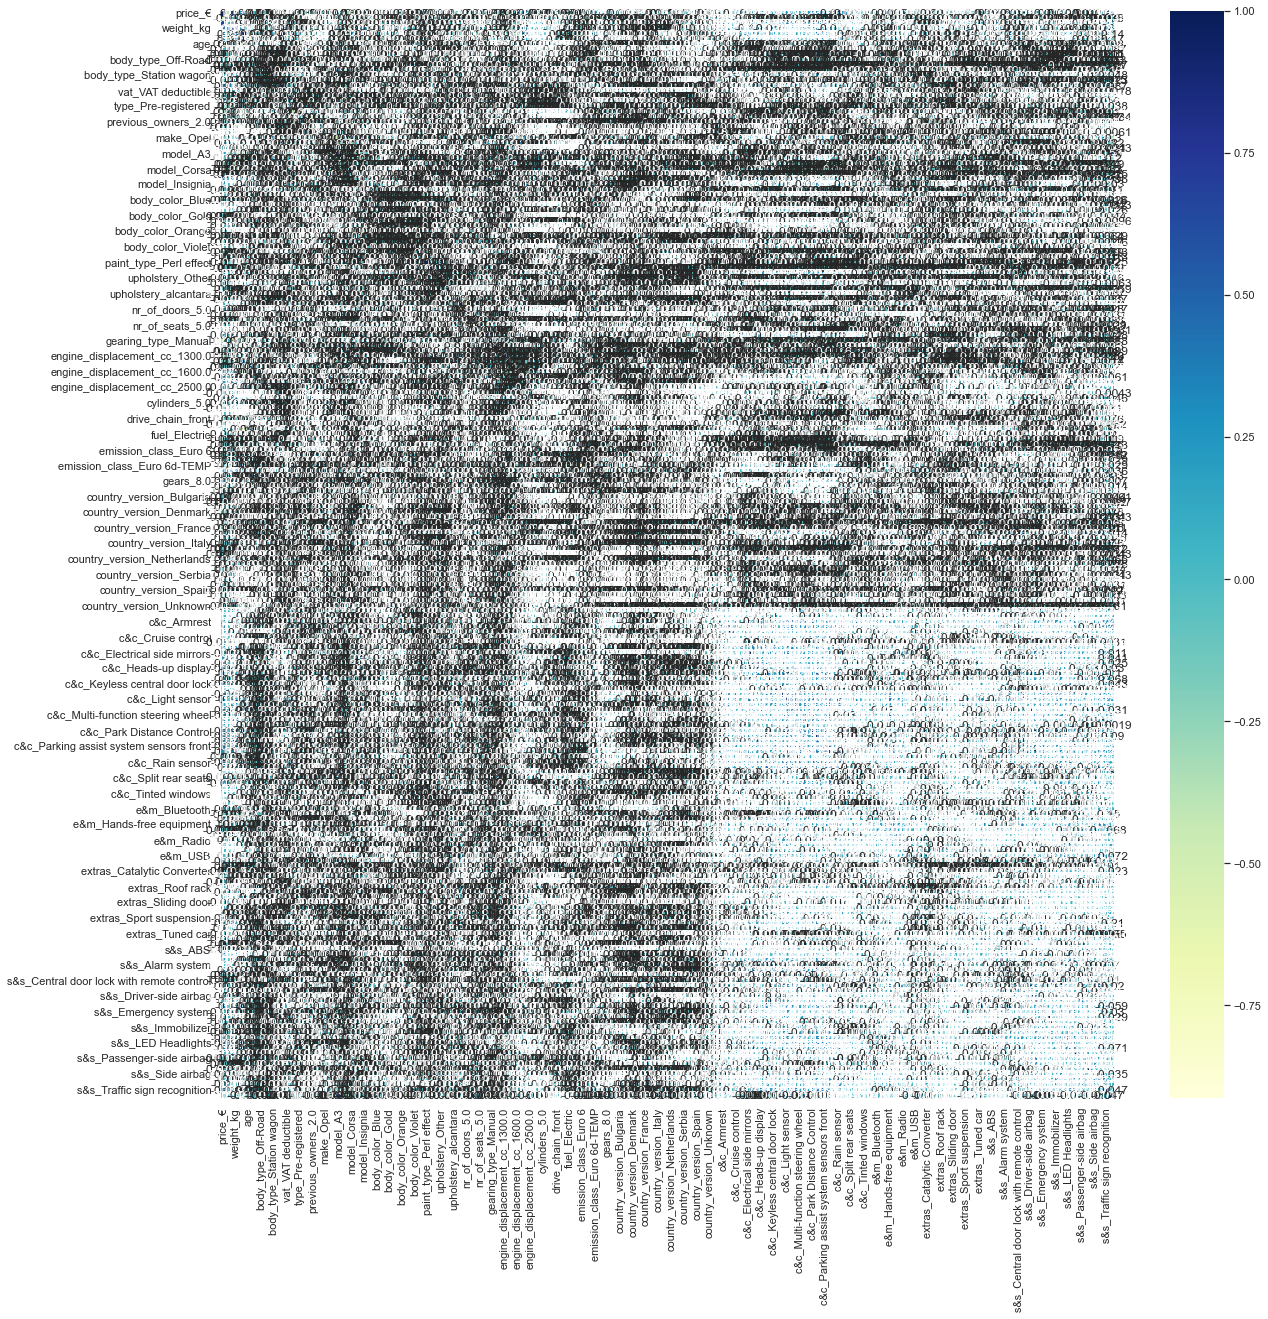

In [19]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_final.corr(),cmap="YlGnBu", annot=True)

In [22]:
df.to_csv("getdummied_autoscout.csv", index=False)